In [2]:
import cv2
from skimage.segmentation import slic
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from square import get_corners,get_slice
import time

In [52]:
bgr = cv2.imread('roboview.jpg')
rgb = io.imread('roboview.jpg')


lab = cv2.cvtColor(rgb,cv2.COLOR_BGR2LAB)


(480, 640, 3)

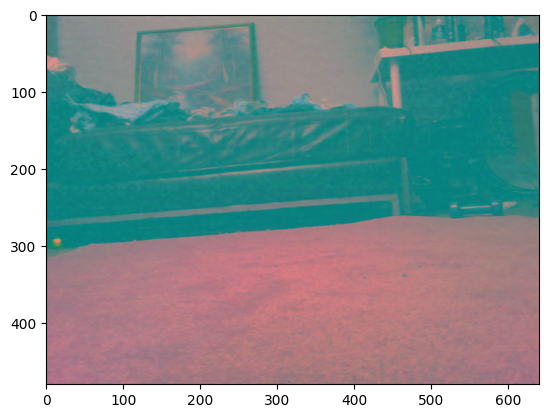

In [53]:
plt.imshow(lab)
lab.shape

In [71]:
(height,width,_) = lab.shape

# lab_small = cv2.resize(lab,(width//5,height//5),interpolation= cv2.INTER_LINEAR)
# rgb_small = cv2.resize(rgb,(width//5,height//5),interpolation= cv2.INTER_LINEAR)
lab_small = cv2.resize(lab,(width,height),interpolation= cv2.INTER_LINEAR)
rgb_small = cv2.resize(rgb,(width,height),interpolation= cv2.INTER_LINEAR)

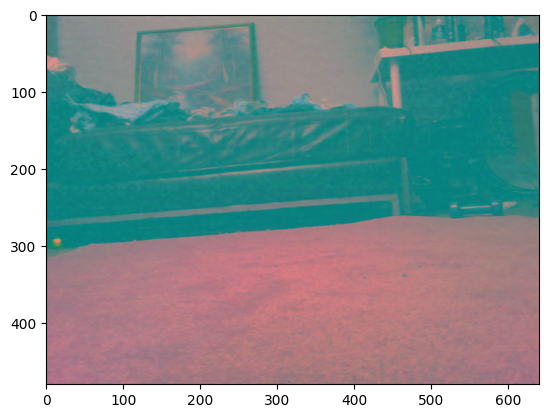

In [72]:
plt.imshow(lab)

In [73]:
segments_slic = slic(rgb_small, n_segments=100, compactness=10, sigma=1,
                     start_label=0,convert2lab=True)

segments_slic

array([[ 0,  0,  0, ...,  6,  6,  6],
       [ 0,  0,  0, ...,  6,  6,  6],
       [ 0,  0,  0, ...,  6,  6,  6],
       ...,
       [84, 84, 84, ..., 90, 90, 90],
       [84, 84, 84, ..., 90, 90, 90],
       [84, 84, 84, ..., 90, 90, 90]], dtype=int64)

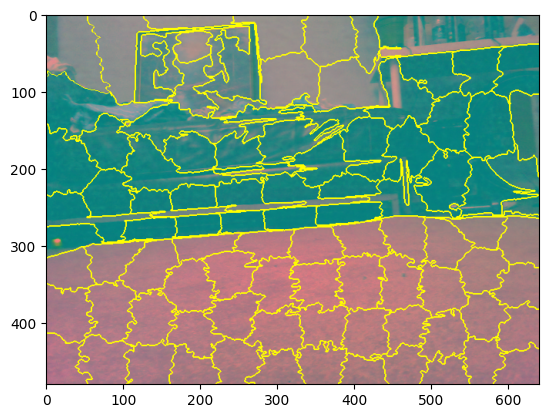

In [74]:
plt.imshow(mark_boundaries(lab_small,segments_slic))

In [75]:
all_labels = np.unique(segments_slic)

In [76]:
lab_small.shape

(480, 640, 3)

In [77]:
def mean(label):
    return lab_small[segments_slic==label].mean(axis=0)

means = np.array([mean(label) for label in all_labels]).astype('uint8')
print(means.shape)

print(means.shape)
means.max()
print(means)

(96, 3)
(96, 3)
[[123 138 138]
 [140 142 142]
 [148 145 142]
 [150 144 140]
 [142 143 139]
 [112 139 136]
 [ 88 135 129]
 [ 82 133 132]
 [118 137 137]
 [ 79 133 131]
 [154 144 141]
 [106 137 139]
 [ 13 129 126]
 [ 16 129 126]
 [143 142 140]
 [133 142 139]
 [ 24 129 127]
 [112 139 142]
 [ 57 133 130]
 [ 52 138 138]
 [ 51 126 119]
 [ 16 130 128]
 [ 12 130 127]
 [ 57 134 132]
 [ 57 134 133]
 [ 46 133 130]
 [ 27 132 128]
 [ 15 129 127]
 [ 21 130 126]
 [ 47 131 129]
 [ 14 131 128]
 [ 35 131 129]
 [ 49 132 129]
 [ 28 131 127]
 [ 30 132 128]
 [ 44 131 126]
 [ 10 130 128]
 [ 18 131 128]
 [ 42 130 127]
 [ 14 131 127]
 [ 42 128 127]
 [ 18 129 126]
 [ 47 129 128]
 [ 19 129 126]
 [ 47 130 128]
 [ 29 130 129]
 [ 11 129 127]
 [ 18 128 127]
 [ 20 128 128]
 [ 12 129 128]
 [169 126 129]
 [152 127 126]
 [ 17 129 128]
 [165 127 128]
 [152 129 127]
 [180 124 129]
 [ 27 130 125]
 [188 122 130]
 [184 121 131]
 [173 123 133]
 [173 124 133]
 [159 125 132]
 [155 123 132]
 [168 127 127]
 [196 121 132]
 [190 125

In [78]:
def sd(label):
    return lab_small[segments_slic==label].std(axis=0)

sds = np.array([sd(label) for label in all_labels]).astype('uint8')
print(sds.shape)
sds.max()

(96, 3)


53

In [79]:
# def aspectRatio(label):
#     (height,width) =  np.where(segments_slic==label)
#     minHeight = (height.min(),width[np.argmin(height)])
#     maxHeight = (height.max(),width[np.argmax(height)])
#     minWidth = (width.min(),height[np.argmin(width)])
#     maxWidth = (height.max(),height[np.argmax(width)])

# sds = np.array([sd(label) for label in all_labels]).astype('uint8')
# print(sds.shape)
# sds.max()

def aspectRatio(segments,label):
    #consider converting original segments
  mask = np.zeros((segments.shape))
  mask[segments==label]=255
  contours,_=cv2.findContours(mask.astype('uint8'), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  x,y,w,h = cv2.boundingRect(contours[0])
  aspect_ratio = float(w)/h
  return aspect_ratio

aspect_ratios = np.array([aspectRatio(segments_slic,label) for label in all_labels])


print(aspect_ratios)


[0.80952381 1.11016949 1.75280899 1.61290323 1.08695652 0.88311688
 3.82142857 0.91428571 1.24657534 0.83333333 1.21428571 0.66666667
 0.79487179 1.09230769 1.72413793 2.06329114 1.5483871  0.97647059
 1.06451613 1.82222222 0.33928571 0.81609195 0.74444444 3.13636364
 2.21568627 2.78846154 1.18421053 0.63793103 0.87058824 1.91525424
 0.76595745 2.35714286 2.34482759 1.75342466 2.48051948 0.72340426
 0.85555556 1.4375     3.20512821 1.1875     2.9787234  2.34285714
 2.70454545 1.74285714 4.         2.27536232 2.9        3.875
 2.83870968 2.16129032 1.16176471 0.8358209  4.625      1.
 2.18604651 1.85714286 3.15909091 1.52       1.66       2.29268293
 1.01265823 1.58333333 1.09836066 1.18032787 1.140625   0.79746835
 0.89473684 0.96       1.12328767 1.02857143 0.90666667 1.04918033
 0.82926829 0.87012987 0.97297297 1.         1.25       0.85074627
 1.3125     1.09859155 0.97014925 0.95652174 0.91666667 1.171875
 0.90909091 1.1875     1.12903226 1.03225806 1.17241379 1.19642857
 1.1111111

In [80]:
segment_statistics = np.concatenate((means,sds),axis=1)
segment_statistics.shape
#segment_statistics = segment_statistics/segment_statistics.max(axis=0)

(96, 6)

[171.31740552 121.38953488 124.46039244  10.5196944    2.05832634
   1.36713963]
[171.31740552 121.38953488 124.46039244  10.5196944    2.05832634
   1.36713963]


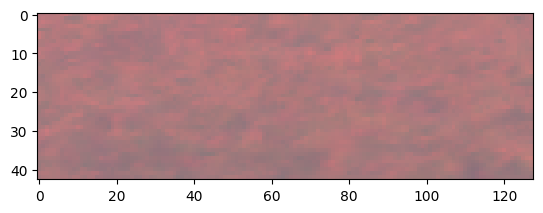

In [81]:
(top_left,top_right) = get_corners(lab,(45,90),(65,99))
roi = get_slice(lab,top_left,top_right).copy()
plt.imshow(roi)
roi_mean = roi.mean(axis=0).mean(axis=0)
roi_sd = roi.reshape((43*128),3).std(axis=0)

roi_statistics = np.array((roi_mean,roi_sd)).reshape(6)
print(roi_statistics)
#roi_statistics = roi_statistics/roi_statistics.max(axis=0)
print(roi_statistics)


In [82]:
simplified = np.take(means,segments_slic,axis=0)

simplified.shape

(480, 640, 3)

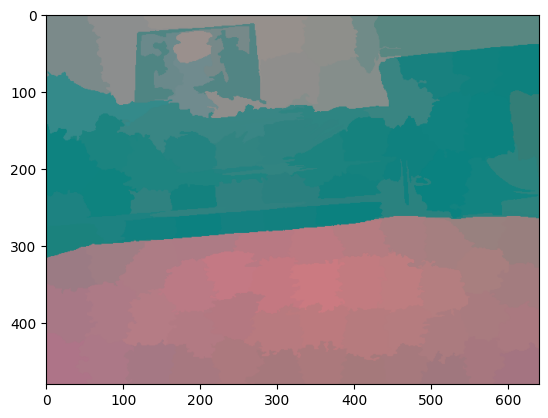

In [83]:
plt.imshow(simplified)

In [84]:
#ssd = np.sum((means-roi_mean)**2+(sds-roi_sd)**2,axis=1)

parameters = np.array([1,1,1,1,1,1])

sd = (segment_statistics-roi_statistics)**2
ssd = np.sum(sd,axis=1)
ssd = ssd/ssd.max()



print(ssd.shape)

ssd.max()

(96,)


1.0

In [85]:
ssd_image = np.take(ssd,segments_slic)

In [86]:
ssd_image.shape

(480, 640)

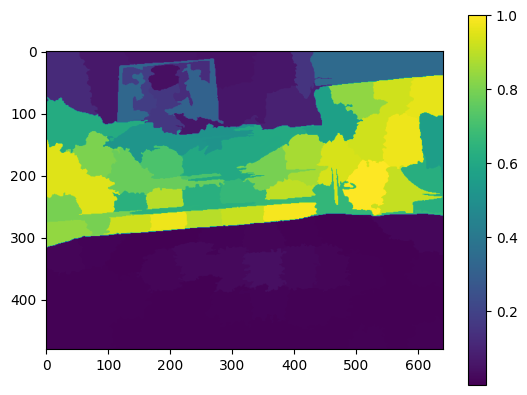

In [88]:
plt.imshow(ssd_image)
plt.colorbar()

In [89]:
ssd_image.max()

1.0

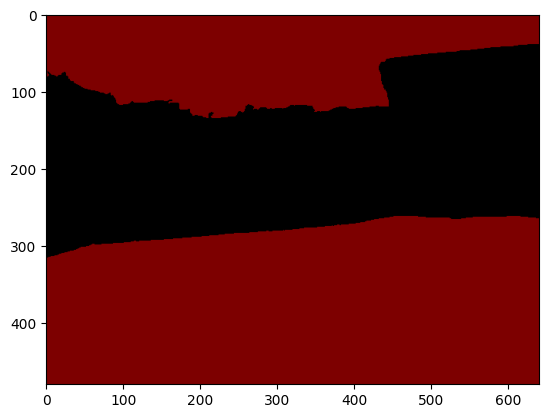

In [93]:
threshold = 0.5

mask = np.zeros((ssd_image.shape[0],ssd_image.shape[1],3),dtype='uint8')

mask[ssd_image<threshold]=np.array([125,0,0])



plt.imshow(mask)

In [94]:
result = cv2.addWeighted(rgb_small,0.9,mask,0.5,0.3)

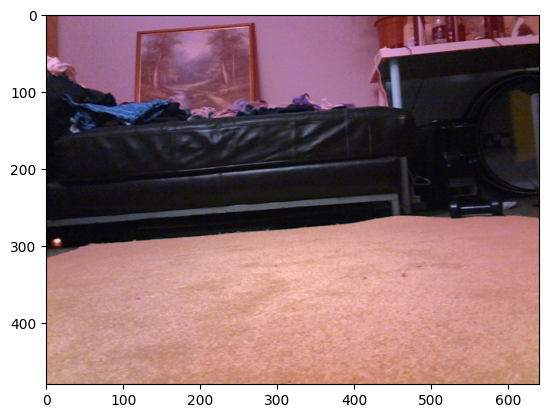

In [95]:
plt.imshow(result)